# Experiement: Round Three | 34%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_34.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  42368  23228       1     170    72.0    150     90            2     2   
1  30900  21029       1     166    68.0    140     90            1     1   
2  17267  21768       2     168    74.0    160    100            3     1   
3  72288  18322       2     171    94.0    130     90            3     1   
4   4163  15246       1     170   107.0    110     80            3     3   

   smoke  alco  active  cardio  
0      0     0       0       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     1       0       1  
4      0     0       0       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52679 entries, 0 to 52678
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           52679 non-null  int64  
 1   age          52679 non-null  int64  
 2   gender       52679 non-null  int64  
 3   height       52679 non-null  int64  
 4   weight       52679 non-null  float64
 5   ap_hi        52679 non-null  int64  
 6   ap_lo        52679 non-null  int64  
 7   cholesterol  52679 non-null  int64  
 8   gluc         52679 non-null  int64  
 9   smoke        52679 non-null  int64  
 10  alco         52679 non-null  int64  
 11  active       52679 non-null  int64  
 12  cardio       52679 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.2 MB


0    34679
1    18000
Name: cardio, dtype: int64

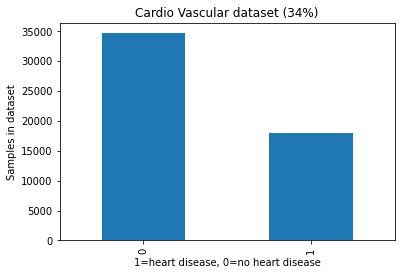

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (34%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

The balance ratio is (18000/52679=0,34169213) approximately 34%.

# Train/test split 

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

# Logistic Regression with raw data

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81     27743
           1       0.68      0.35      0.47     14400

    accuracy                           0.72     42143
   macro avg       0.70      0.63      0.64     42143
weighted avg       0.71      0.72      0.69     42143



In [6]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      6936
           1       0.66      0.35      0.46      3600

    accuracy                           0.72     10536
   macro avg       0.69      0.63      0.63     10536
weighted avg       0.71      0.72      0.69     10536



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.755


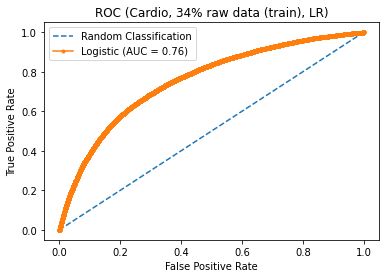

In [7]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.742


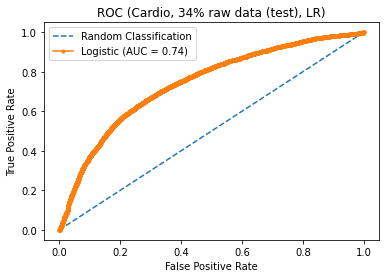

In [8]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     27743
           1       0.72      0.49      0.59     14400

    accuracy                           0.76     42143
   macro avg       0.75      0.70      0.71     42143
weighted avg       0.76      0.76      0.75     42143



In [10]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      6936
           1       0.68      0.47      0.56      3600

    accuracy                           0.74     10536
   macro avg       0.72      0.68      0.69     10536
weighted avg       0.74      0.74      0.73     10536



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.794


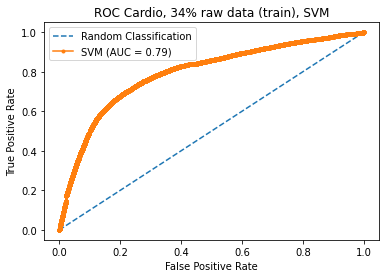

In [11]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.769


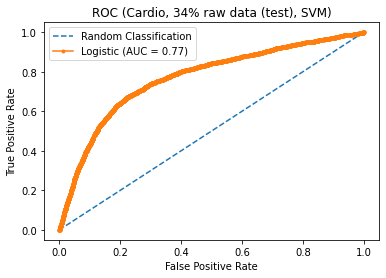

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw data

In [13]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [14]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.22810	validation_0-logloss:0.66164	validation_1-error:0.23690	validation_1-logloss:0.66250
[1]	validation_0-error:0.22903	validation_0-logloss:0.63594	validation_1-error:0.23643	validation_1-logloss:0.63762
[2]	validation_0-error:0.22787	validation_0-logloss:0.61479	validation_1-error:0.23519	validation_1-logloss:0.61718
[3]	validation_0-error:0.22806	validation_0-logloss:0.59723	validation_1-error:0.23510	validation_1-logloss:0.60025
[4]	validation_0-error:0.22822	validation_0-logloss:0.58217	validation_1-error:0.23519	validation_1-logloss:0.58593
[5]	validation_0-error:0.22756	validation_0-logloss:0.56968	validation_1-error:0.23510	validation_1-logloss:0.57396
[6]	validation_0-error:0.22744	validation_0-logloss:0.55910	validation_1-error:0.23519	validation_1-logloss:0.56402
[7]	validation_0-error:0.22751	validation_0-logloss:0.55015	validation_1-error:0.23548	validation_1-logloss:0.55570
[8]	validation_0-error:0.22756	validation_0-logloss:0.54270	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     27743
           1       0.72      0.56      0.63     14400

    accuracy                           0.78     42143
   macro avg       0.76      0.73      0.74     42143
weighted avg       0.77      0.78      0.77     42143



In [16]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6936
           1       0.70      0.55      0.61      3600

    accuracy                           0.77     10536
   macro avg       0.74      0.71      0.72     10536
weighted avg       0.76      0.77      0.76     10536



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.814


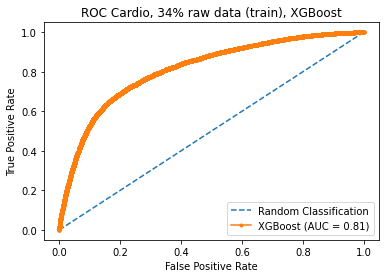

In [17]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.795


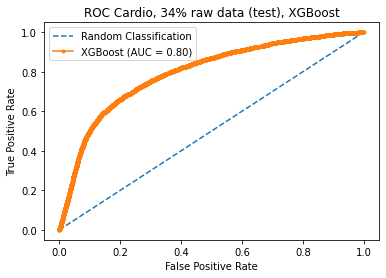

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [19]:
df_train = X_train
df_train['cardio'] = y_train

In [20]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
9014  91096  18151       2     168    90.0    140     90            2     1   
9909   6902  14704       1     158    74.0    170    100            1     1   
9422  86526  21074       2     162    93.0    150    100            1     1   
4898  28813  21396       2     174    78.0    130     80            1     1   
4033  37943  21826       2     161    78.0    130     70            1     1   

      smoke  alco  active  cardio  
9014      1     0       0       1  
9909      1     0       1       1  
9422      0     0       0       1  
4898      0     0       1       1  
4033      0     0       0       1

# SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

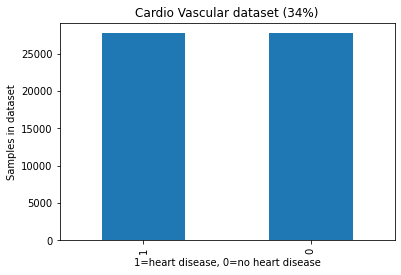

In [21]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (34%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [22]:
X_train = df_oversampler
y_train = df_oversampler_y

# Logistic Regression with SMOTE

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     27743
           1       0.72      0.68      0.70     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [24]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      6936
           1       0.56      0.65      0.60      3600

    accuracy                           0.70     10536
   macro avg       0.68      0.69      0.68     10536
weighted avg       0.72      0.70      0.71     10536



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774


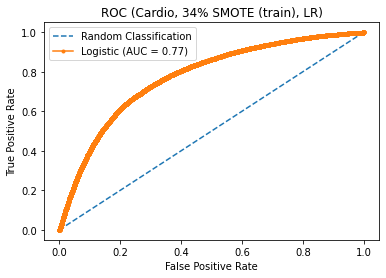

In [25]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


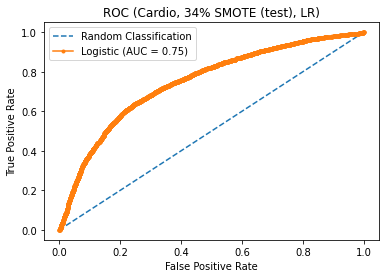

In [26]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with SMOTE data

In [27]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     27743
           1       0.76      0.73      0.75     27743

    accuracy                           0.75     55486
   macro avg       0.75      0.75      0.75     55486
weighted avg       0.75      0.75      0.75     55486



In [28]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      6936
           1       0.58      0.65      0.61      3600

    accuracy                           0.72     10536
   macro avg       0.69      0.70      0.70     10536
weighted avg       0.73      0.72      0.72     10536



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.817


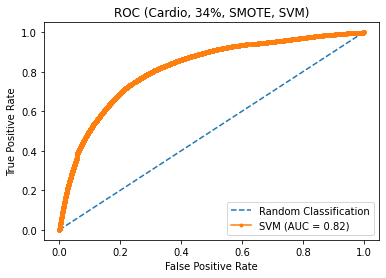

In [29]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.766


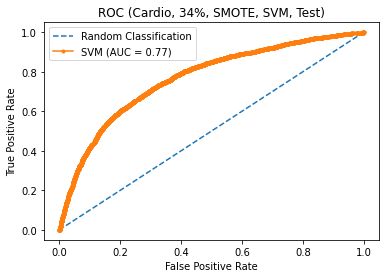

In [30]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with SMOTE data

In [31]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.23154	validation_0-logloss:0.65975	validation_1-error:0.24782	validation_1-logloss:0.66630
[1]	validation_0-error:0.23184	validation_0-logloss:0.63294	validation_1-error:0.24250	validation_1-logloss:0.64451
[2]	validation_0-error:0.23436	validation_0-logloss:0.61084	validation_1-error:0.24269	validation_1-logloss:0.62669
[3]	validation_0-error:0.23092	validation_0-logloss:0.59181	validation_1-error:0.24241	validation_1-logloss:0.61183
[4]	validation_0-error:0.22784	validation_0-logloss:0.57583	validation_1-error:0.24212	validation_1-logloss:0.59976
[5]	validation_0-error:0.22905	validation_0-logloss:0.56256	validation_1-error:0.24165	validation_1-logloss:0.58942
[6]	validation_0-error:0.22434	validation_0-logloss:0.55049	validation_1-error:0.24317	validation_1-logloss:0.58083
[7]	validation_0-error:0.22838	validation_0-logloss:0.54089	validation_1-error:0.24203	validation_1-logloss:0.57336
[8]	validation_0-error:0.22617	validation_0-logloss:0.53252	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     27743
           1       0.82      0.76      0.79     27743

    accuracy                           0.80     55486
   macro avg       0.80      0.80      0.80     55486
weighted avg       0.80      0.80      0.80     55486



In [33]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      6936
           1       0.65      0.60      0.62      3600

    accuracy                           0.75     10536
   macro avg       0.72      0.72      0.72     10536
weighted avg       0.75      0.75      0.75     10536



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.872


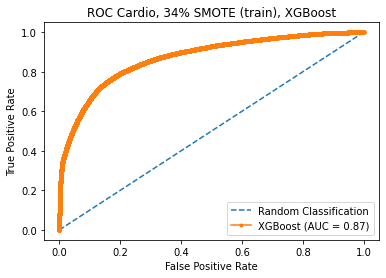

In [34]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.788


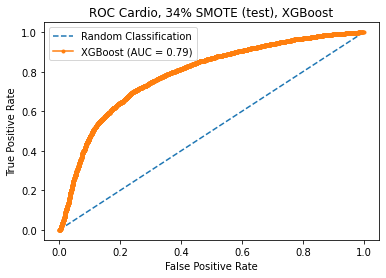

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation with TVAE

In [36]:
df_train['cardio'].value_counts()

0    27743
1    14400
Name: cardio, dtype: int64

In [37]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(15000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1    14723
Name: cardio, dtype: int64

In [38]:
df_train_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
df_train_1['cardio'].value_counts()

1    14723
Name: cardio, dtype: int64

In [39]:
df_train_0 = df_train[df_train['cardio'] == 0]
df_train_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [40]:
train_df_0_sm = df_train_0.sample(n = 16000)
train_df_sm = train_df_0_sm.append(df_train_1)

In [41]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(train_df_sm)
# Once trained generate samples
samples = tvae.sample(15000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([train_df_sm,samples])
tvae_result_df1['cardio'].value_counts()

1    20089
0    16000
Name: cardio, dtype: int64

In [42]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

1    27470
0    16000
Name: cardio, dtype: int64

In [45]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

1    30276
0    16000
Name: cardio, dtype: int64

In [46]:
tvae_result_df_1 = tvae_result_df2[tvae_result_df2['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    30276
Name: cardio, dtype: int64

In [47]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)
train_df_balanced = train_df_1_bal.append(df_train_0)

1    27743
0    27743
Name: cardio, dtype: int64

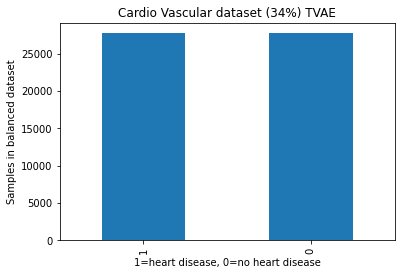

In [48]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (34%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [49]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

# Logistic Regression with TVAE data

In [50]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     27743
           1       0.65      0.57      0.61     27743

    accuracy                           0.63     55486
   macro avg       0.63      0.63      0.63     55486
weighted avg       0.63      0.63      0.63     55486



In [51]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      6936
           1       0.51      0.65      0.57      3600

    accuracy                           0.67     10536
   macro avg       0.65      0.66      0.65     10536
weighted avg       0.69      0.67      0.67     10536



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.658


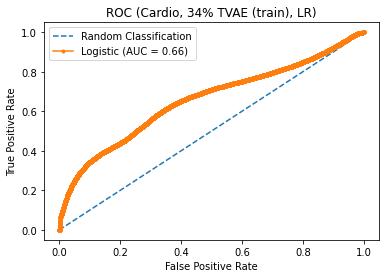

In [52]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.720


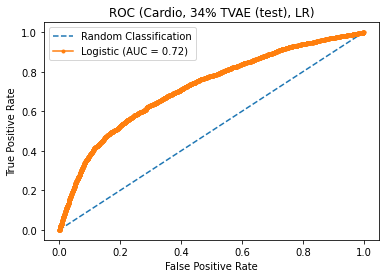

In [53]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with TVAE balanced data

In [54]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82     27743
           1       0.88      0.71      0.79     27743

    accuracy                           0.81     55486
   macro avg       0.82      0.81      0.80     55486
weighted avg       0.82      0.81      0.80     55486



In [55]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      6936
           1       0.67      0.44      0.53      3600

    accuracy                           0.74     10536
   macro avg       0.71      0.66      0.67     10536
weighted avg       0.73      0.74      0.72     10536



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.882


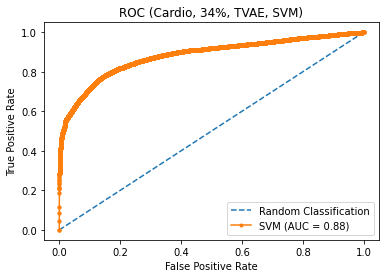

In [56]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.763


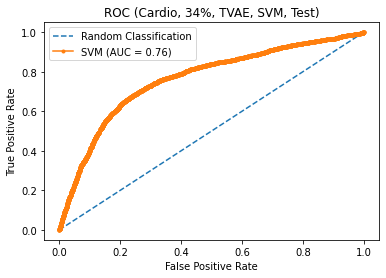

In [57]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [58]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.19623	validation_0-logloss:0.65346	validation_1-error:0.24317	validation_1-logloss:0.66917
[1]	validation_0-error:0.19627	validation_0-logloss:0.62105	validation_1-error:0.24345	validation_1-logloss:0.64962
[2]	validation_0-error:0.19627	validation_0-logloss:0.59426	validation_1-error:0.24345	validation_1-logloss:0.63350
[3]	validation_0-error:0.19627	validation_0-logloss:0.57043	validation_1-error:0.24345	validation_1-logloss:0.61793
[4]	validation_0-error:0.19616	validation_0-logloss:0.55044	validation_1-error:0.24355	validation_1-logloss:0.60512
[5]	validation_0-error:0.19603	validation_0-logloss:0.53361	validation_1-error:0.24411	validation_1-logloss:0.59460
[6]	validation_0-error:0.19124	validation_0-logloss:0.51931	validation_1-error:0.23785	validation_1-logloss:0.58489
[7]	validation_0-error:0.19133	validation_0-logloss:0.50688	validation_1-error:0.23785	validation_1-logloss:0.57769
[8]	validation_0-error:0.19133	validation_0-logloss:0.49622	validation_1

[71]	validation_0-error:0.17213	validation_0-logloss:0.37787	validation_1-error:0.23842	validation_1-logloss:0.51538
[72]	validation_0-error:0.17208	validation_0-logloss:0.37762	validation_1-error:0.23804	validation_1-logloss:0.51541
[73]	validation_0-error:0.17177	validation_0-logloss:0.37710	validation_1-error:0.23833	validation_1-logloss:0.51543
[74]	validation_0-error:0.17159	validation_0-logloss:0.37688	validation_1-error:0.23842	validation_1-logloss:0.51540
[75]	validation_0-error:0.17150	validation_0-logloss:0.37670	validation_1-error:0.23871	validation_1-logloss:0.51527
[76]	validation_0-error:0.17156	validation_0-logloss:0.37639	validation_1-error:0.23861	validation_1-logloss:0.51520
[77]	validation_0-error:0.17167	validation_0-logloss:0.37598	validation_1-error:0.23833	validation_1-logloss:0.51518
[78]	validation_0-error:0.17158	validation_0-logloss:0.37585	validation_1-error:0.23861	validation_1-logloss:0.51511
[79]	validation_0-error:0.17102	validation_0-logloss:0.37534	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     27743
           1       0.88      0.77      0.82     27743

    accuracy                           0.83     55486
   macro avg       0.83      0.83      0.83     55486
weighted avg       0.83      0.83      0.83     55486



In [60]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      6936
           1       0.70      0.52      0.60      3600

    accuracy                           0.76     10536
   macro avg       0.74      0.70      0.72     10536
weighted avg       0.76      0.76      0.75     10536



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.903


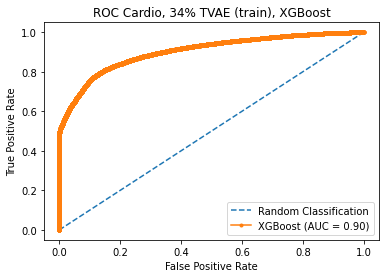

In [61]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.790


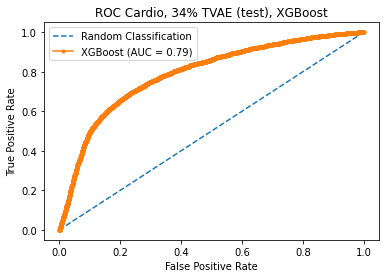

In [62]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# CTGAN for balancing the dataset

In [63]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(df_train, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(10000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    3968
Name: cardio, dtype: int64

In [64]:
df_train_samples = df_train.append(samples)
df_train_samples['cardio'].value_counts()

0    27743
1    18368
Name: cardio, dtype: int64

In [65]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_samples, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(10000)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    3951
Name: cardio, dtype: int64

In [66]:
df_train_samples1 = df_train_samples.append(samples1)
df_train_samples1['cardio'].value_counts()

0    27743
1    22319
Name: cardio, dtype: int64

In [67]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_samples1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(10000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    5457
Name: cardio, dtype: int64

In [68]:
train_df_all = samples2.append(df_train_samples1)
train_df_all_1 = train_df_all[train_df_all['cardio'] == 1]
train_df_all_0 = df_train[df_train['cardio'] == 0]
train_df_1_bal = train_df_all_1.sample(n = 27743)
df_train_bal = train_df_1_bal.append(train_df_all_0)
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [69]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

# Logistic Regression with CTGAN data

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     27743
           1       0.68      0.65      0.66     27743

    accuracy                           0.67     55486
   macro avg       0.67      0.67      0.67     55486
weighted avg       0.67      0.67      0.67     55486



In [71]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      6936
           1       0.53      0.67      0.59      3600

    accuracy                           0.68     10536
   macro avg       0.67      0.68      0.67     10536
weighted avg       0.71      0.68      0.69     10536



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.729


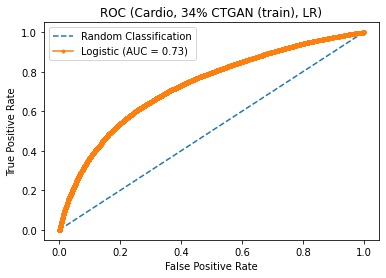

In [72]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.742


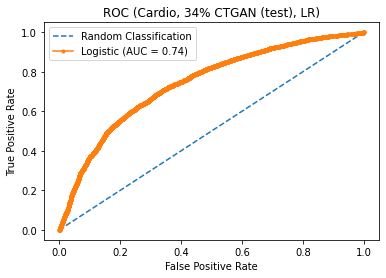

In [73]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with CTGAN data

In [74]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     27743
           1       0.75      0.71      0.73     27743

    accuracy                           0.74     55486
   macro avg       0.74      0.74      0.74     55486
weighted avg       0.74      0.74      0.74     55486



In [75]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      6936
           1       0.58      0.66      0.62      3600

    accuracy                           0.72     10536
   macro avg       0.70      0.71      0.70     10536
weighted avg       0.73      0.72      0.73     10536



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.800


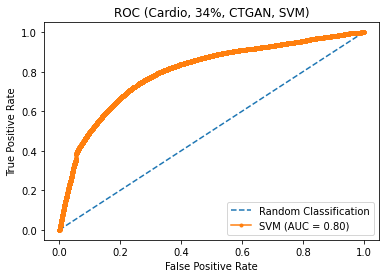

In [76]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.764


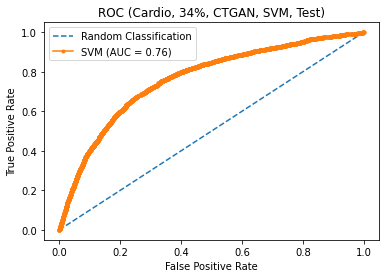

In [77]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 34%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost

In [78]:

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.25678	validation_0-logloss:0.66555	validation_1-error:0.25588	validation_1-logloss:0.67031
[1]	validation_0-error:0.25518	validation_0-logloss:0.64221	validation_1-error:0.26538	validation_1-logloss:0.65144
[2]	validation_0-error:0.24900	validation_0-logloss:0.62198	validation_1-error:0.25987	validation_1-logloss:0.63448
[3]	validation_0-error:0.23757	validation_0-logloss:0.60500	validation_1-error:0.25010	validation_1-logloss:0.62051
[4]	validation_0-error:0.23656	validation_0-logloss:0.59086	validation_1-error:0.25788	validation_1-logloss:0.60893
[5]	validation_0-error:0.23649	validation_0-logloss:0.57944	validation_1-error:0.24924	validation_1-logloss:0.59972
[6]	validation_0-error:0.23525	validation_0-logloss:0.56553	validation_1-error:0.25218	validation_1-logloss:0.59064
[7]	validation_0-error:0.23330	validation_0-logloss:0.55634	validation_1-error:0.24658	validation_1-logloss:0.58346
[8]	validation_0-error:0.23345	validation_0-logloss:0.54910	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82     27743
           1       0.84      0.76      0.80     27743

    accuracy                           0.81     55486
   macro avg       0.81      0.81      0.81     55486
weighted avg       0.81      0.81      0.81     55486



In [80]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      6936
           1       0.66      0.57      0.61      3600

    accuracy                           0.75     10536
   macro avg       0.73      0.71      0.72     10536
weighted avg       0.75      0.75      0.75     10536



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.879


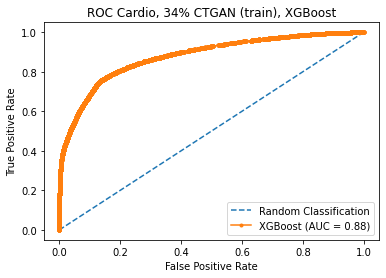

In [81]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.782


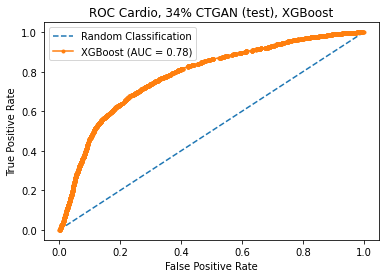

In [82]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 34% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()